In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
%matplotlib inline
%config lnlineBackend.figure_formats = {'png', 'retina'}

In [5]:
target = pd.DataFrame(boston.target, columns=["LOAD"])
target.head()

,LOAD
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
datas = pd.DataFrame(boston.data, columns=boston.feature_names)
datas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
tot = pd.concat([datas, target], axis=1)
tot.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOAD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
x = np.array(tot['RM'])
y = np.array(tot['LOAD'])

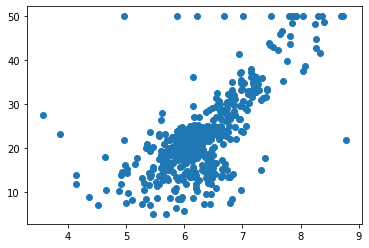

In [9]:
plt.scatter(x,y)

In [10]:
avg_x = np.average(x)
avg_y = np.average(y)

In [11]:
var_x = [(avg_x - i) for i in x]
var_y = [(avg_y - i) for i in y]

In [12]:
sxx_list = [a * b for a ,b in zip(var_x,var_x)]
sxx = np.sum(sxx_list)

sxy_list = [a * b for a ,b in zip(var_x,var_y)]
sxy = np.sum(sxy_list)

In [13]:
m = sxy / sxx
b = avg_y - (m * avg_x)

In [14]:
def predict(x):
    return m*x + b

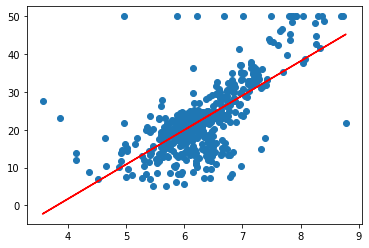

In [15]:
plt.scatter(x,y)
plt.plot(tot['RM'],predict(tot['RM']), color='red')

In [17]:
m_x = tot['RM'].to_frame()
m_x.insert(0, 'Const', 1)
m_x.head()

,Const,RM
0,1,6.575
1,1,6.421
2,1,7.185
3,1,6.998
4,1,7.147


In [18]:
w = np.linalg.inv(m_x.T @ m_x) @ m_x.T @ boston.target
w

0   -34.670621
1     9.102109
dtype: float64

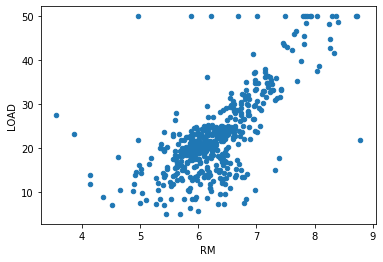

In [19]:
tot.plot(kind='scatter', x='RM', y='LOAD')

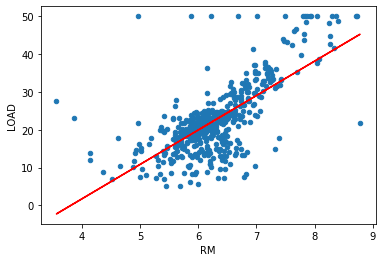

In [20]:
tot.plot(kind='scatter', x='RM', y='LOAD')
plt.plot(tot['RM'], (tot['RM'] * w[1]) + w[0], color='red')

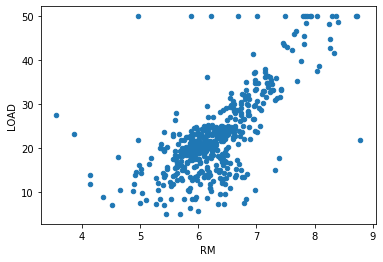

In [21]:
tot.plot(kind='scatter', x='RM', y='LOAD')

In [25]:
lr = LinearRegression()
lr.fit(X=pd.DataFrame(tot['RM']), y=tot['LOAD'])
prediction = lr.predict(X=pd.DataFrame(tot['RM']))

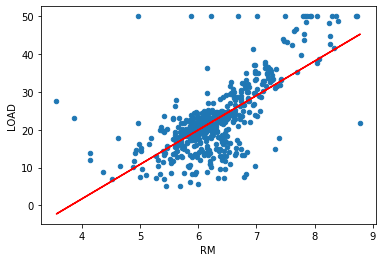

In [26]:
tot.plot(kind='scatter', x='RM', y='LOAD')
plt.plot(tot['RM'], prediction, color='red')

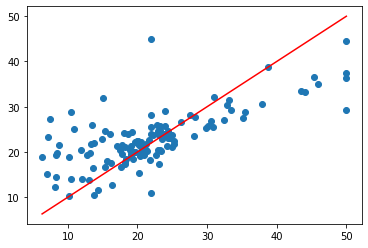

In [27]:
rm = tot['RM'].to_frame()
load = tot['LOAD'].to_frame()
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(rm, load)
train_lr = sklearn.linear_model.LinearRegression(fit_intercept = True) 
train_lr.fit(train_x, train_y) 
pred_y = train_lr.predict(test_x)

plt.scatter(test_y, pred_y) 
line = np.linspace(test_y.min(), test_y.max(), 1000)
plt.plot(line, line, color='red')

In [30]:
dfX = sm.add_constant(datas)
dfy = target

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   LOAD   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 May 2020   Prob (F-statistic):          6.72e-135
Time:                        23:34:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [31]:
ols_reg = sm.OLS(train_y, train_x).fit()
ols_reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LOAD   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              3589.
Date:                Wed, 27 May 2020   Prob (F-statistic):                   4.61e-195
Time:                        23:34:27   Log-Likelihood:                         -1304.9
No. Observations:                 379   AIC:                                      2612.
Df Residuals:                     378   BIC:                                      2616.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6904      0.062     59.911      0.000       3.569       3.811
==============================================================================
Omnibus:                       70.429   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.013
Skew:                           1.014   Prob(JB):                     4.81e-30
Kurtosis:                       5.107   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""